<a href="https://colab.research.google.com/github/KTB2110/PortfolioProjects/blob/Projects/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
consumer_key = 'wrgcTm9B6aTG8V6mXGGYcyGvV'
consumer_secret = 'FfhE4OLpgx0B4Qmekr5ktvzVl8MDSLi5QZiS1iyzYaOo8ZaWTf'
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name = 'BillGates', count = 100, lang = 'en', tweet_mode = 'extended')

In [8]:
# Creating a dataframe from posts

df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweet'])
df

,Tweet
0,I’m hopeful that the world can come together t...
1,The goal of no more pandemics ever is ambitiou...
2,I’m more optimistic than ever that we can one ...
3,I believe that COVID-19 can be the last pandem...
4,Science fiction can help expand our understand...
...,...
95,To tackle the biggest global health challenges...
96,I recently met with 36 remarkable graduate stu...
97,Many thanks to @YoYo_Ma for helping us spotlig...
98,Setting concrete goals is a critical first ste...


In [10]:
# Cleaning the text
# creating a function to do so
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)   #Removes @mentions
  text = re.sub(r'#', '', text)   # Removing #hashtags
  text = re.sub(r'RT[\s]+', '', text)   #Removing retweets
  text = re.sub(r'https?:\/\/\S+', '', text)  #Removing hyperlinks

  return text


In [ ]:
df['Tweet'] = df['Tweet'].apply(cleanText)
df

In [15]:
# Creating a function to get the subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Creating a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creating the new columns: Subjectivity and Polarity
df['Subjectivity'] = df.Tweet.apply(getSubjectivity)
df['Polarity'] = df.Tweet.apply(getPolarity)
df

,Tweet,Subjectivity,Polarity
0,I’m hopeful that the world can come together t...,0.316667,0.333333
1,The goal of no more pandemics ever is ambitiou...,0.329167,0.075000
2,I’m more optimistic than ever that we can one ...,0.500000,0.500000
3,I believe that COVID-19 can be the last pandem...,0.033333,0.000000
4,Science fiction can help expand our understand...,1.000000,0.000000
...,...,...,...
95,To tackle the biggest global health challenges...,0.243750,-0.031250
96,I recently met with 36 remarkable graduate stu...,0.500000,0.416667
97,Many thanks to _Ma for helping us spotlight th...,0.529167,0.347917
98,Setting concrete goals is a critical first ste...,0.686667,0.280000


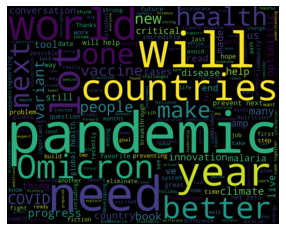

In [55]:
# Plotting the wordcloud

total_words = " ".join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width = 3000, height = 2400, random_state = 21, max_font_size = 750).generate(total_words)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [23]:
# Creating a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [25]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweet,Subjectivity,Polarity,Analysis
0,I’m hopeful that the world can come together t...,0.316667,0.333333,Positive
1,The goal of no more pandemics ever is ambitiou...,0.329167,0.075000,Positive
2,I’m more optimistic than ever that we can one ...,0.500000,0.500000,Positive
3,I believe that COVID-19 can be the last pandem...,0.033333,0.000000,Neutral
4,Science fiction can help expand our understand...,1.000000,0.000000,Neutral
...,...,...,...,...
95,To tackle the biggest global health challenges...,0.243750,-0.031250,Negative
96,I recently met with 36 remarkable graduate stu...,0.500000,0.416667,Positive
97,Many thanks to _Ma for helping us spotlight th...,0.529167,0.347917,Positive
98,Setting concrete goals is a critical first ste...,0.686667,0.280000,Positive


In [41]:
sorted_df = df.sort_values(by = ['Polarity'], ascending = False)
pos_df = sorted_df[sorted_df['Analysis'] == 'Positive'].reset_index()
pos_df[['Tweet','Polarity']]

,Tweet,Polarity
0,I read a lot of great books this year. These w...,0.800000
1,Understanding how the connections in our brain...,0.666667
2,The world has lost a hero. Archbishop Desmond ...,0.666667
3,One of my favorite holiday traditions is shari...,0.600000
4,The London Declaration on NTDs helped dozens o...,0.508333
...,...,...
62,I am optimistic about polio eradication - ...,0.066667
63,A few countries like Australia moved fast to...,0.066327
64,European Commissioner and I discussed the imp...,0.050000
65,I spoke to Prime Minister about his new globa...,0.045455


In [42]:
sorted_df = df.sort_values(by = ['Polarity'], ascending = True)
neg_df = sorted_df[sorted_df['Analysis'] == 'Negative'].reset_index()
neg_df[['Tweet','Polarity']]

,Tweet,Polarity
0,mRna vaccines still can't meet all the demand...,-0.500000
1,: So tough question: where do you think SA...,-0.388889
2,There’s lots of speculation about what Shakesp...,-0.300000
3,The omicron surge is an unfortunate reminder t...,-0.250000
4,The big unknown is how sick omicron makes you....,-0.190476
5,People like you and I and Tony Fauci have ...,-0.166667
6,About 3.6 billion people—nearly half of the wo...,-0.166667
7,Just when it seemed like life would return to ...,-0.116667
8,ICYMI here’s a recap of my conversation with ....,-0.100000
9,"We have some, but not all, of the tools we nee...",-0.083333


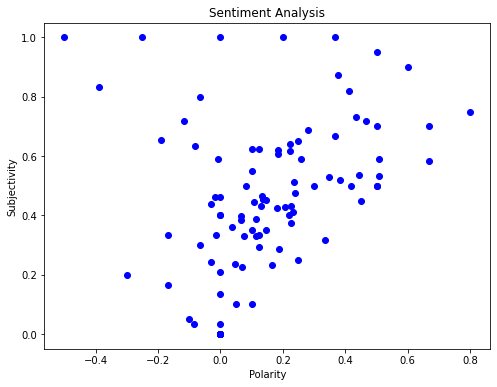

In [43]:
# Plotting the polarity and subjectivity
plt.figure(figsize = (8,6))

for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [48]:
#Percentage of positive tweets

pos_tweets = len(pos_df)
print("Positive percentage: " + str((pos_tweets / len(df)) * 100))

neg_tweets = len(neg_df)
print("Negative percentage: " + str((neg_tweets / len(df)) * 100))

Positive percentage: 67.0
Negative percentage: 18.0


In [49]:
# Showing the value counts
df['Analysis'].value_counts()

Positive    67
Negative    18
Neutral     15
Name: Analysis, dtype: int64

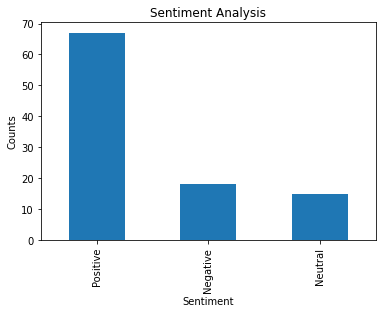

In [51]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()